##Import

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from google.colab import drive


##Import 72 models from dropbox

In [ ]:
#https://www.dropbox.com/s/2nj71g4oue6ida7/model.zip?dl=0
!wget https://www.dropbox.com/s/2nj71g4oue6ida7/model.zip?dl=0 -O model.zip
!unzip model.zip

--2021-05-10 15:41:11--  https://www.dropbox.com/s/2nj71g4oue6ida7/model.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2nj71g4oue6ida7/model.zip [following]
--2021-05-10 15:41:12--  https://www.dropbox.com/s/raw/2nj71g4oue6ida7/model.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbd24e0e8625a7b6be2cb3f9e59.dl.dropboxusercontent.com/cd/0/inline/BON1mhLwa9u9mbl546G5EaG2eoJ2shRTQMCiIT-i84q1escT67qYTgb4G3iHDUKf-evlpSLQl7QnXlCLTbhoO4u9pFKqfvmZYGubPgw_IGJk2Vb-LfhNS74DvdCNTJekIpNzk8Mz4NSFb3pNXGT13XYI/file# [following]
--2021-05-10 15:41:13--  https://ucbd24e0e8625a7b6be2cb3f9e59.dl.dropboxusercontent.com/cd/0/inline/BON1mhLwa9u9mbl546G5EaG2eoJ2shRTQMCiIT-i84q1escT67qYTgb4G3iHDUKf-evlpSLQl7QnXlCLTbhoO4u9pFK

##Import test datas from dropbox

In [ ]:
path_list = ['https://www.dropbox.com/s/szvlotaku92hphi/Chanthaburi_process_data_test_new_6.csv?dl=1',
             'https://www.dropbox.com/s/rwayz8j2l1gtwpa/Chiang%20Mai_process_data_test_new_6.csv?dl=1',
             'https://www.dropbox.com/s/cpexmjijt19lvfd/Kanchanaburi_process_data_test_new_6.csv?dl=1',
             'https://www.dropbox.com/s/mrqwopxmutilkz8/Bangkok_process_data_test_new_6.csv?dl=1',
             'https://www.dropbox.com/s/lhv2vmout26e52b/Khon%20Kaen_process_data_test_new_6.csv?dl=1',
             'https://www.dropbox.com/s/ejtme2fr5qzwwko/Songkhla_process_data_test_new_6.csv?dl=1']

In [ ]:
bkk = 'Bangkok'
ctb = 'Chanthaburi'
cm = 'Chiang Mai'
kbr = 'Kanchanaburi'
kk = 'Khon Kaen'
sk = 'Songkhla'
province = [ctb, cm, kbr, bkk, kk, sk]
pm_data_path = ['/'+x+'_process_data_test_new_6.csv' for x in province]
pm_data_test = []
for tmp_path in path_list:
  df = pd.read_csv(tmp_path)
  df['predict_time'] = df['predict_time'].astype('datetime64[ns]').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
  pm_data_test.append(df)
test = pd.concat(pm_data_test)
test.drop(['Unnamed: 0'], axis=1, inplace=True)
test.rename(columns={'index':'number'}, inplace=True)
test.reset_index(inplace=True)
test.drop(['index'], axis=1, inplace=True)
test['hour'] = test['predict_time'].dt.hour
test['month'] = test['predict_time'].dt.month
test

,number,predict_time,target,PM2.5_x,Wind Speed(km/h)_x,lat_x,long_x,Temp(C)_x,hot_spot_score_1_x,hot_spot_score_2_x,hot_spot_score_3_x,datetime_x,PM2.5_y,Wind Speed(km/h)_y,lat_y,long_y,Temp(C)_y,hot_spot_score_1_y,hot_spot_score_2_y,hot_spot_score_3_y,datetime_y,PM2.5_x.1,Wind Speed(km/h),lat,long,Temp(C),hot_spot_score_1,hot_spot_score_2,hot_spot_score_3,datetime_x.1,PM2.5_y.1,datetime_y.1,PM2.5_x.2,datetime_x.2,PM2.5_y.2,datetime_y.2,hour,month
0,0,2019-03-18 13:00:00+07:00,33.5,32.0,15.0,12.6096,102.1045,30.8,519.854956,34.656997,28.015552,2019-03-18 12:00:00+07:00,26.1,17.0,12.6096,102.1045,27.0,737.399642,43.376450,38.238147,2019-03-18 06:00:00+07:00,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,2019-03-18 00:00:00+07:00,27.7,2019-03-17 18:00:00+07:00,29.2,2019-03-17 12:00:00+07:00,35.1,2019-03-17 06:00:00+07:00,13,3
1,1,2019-03-18 14:00:00+07:00,33.5,32.0,15.0,12.6096,102.1045,30.8,519.854956,34.656997,28.015552,2019-03-18 12:00:00+07:00,26.1,17.0,12.6096,102.1045,27.0,737.399642,43.376450,38.238147,2019-03-18 06:00:00+07:00,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,2019-03-18 00:00:00+07:00,27.7,2019-03-17 18:00:00+07:00,29.2,2019-03-17 12:00:00+07:00,35.1,2019-03-17 06:00:00+07:00,14,3
2,2,2019-03-18 15:00:00+07:00,35.2,32.0,15.0,12.6096,102.1045,30.8,519.854956,34.656997,28.015552,2019-03-18 12:00:00+07:00,26.1,17.0,12.6096,102.1045,27.0,737.399642,43.376450,38.238147,2019-03-18 06:00:00+07:00,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,2019-03-18 00:00:00+07:00,27.7,2019-03-17 18:00:00+07:00,29.2,2019-03-17 12:00:00+07:00,35.1,2019-03-17 06:00:00+07:00,15,3
3,3,2019-03-18 16:00:00+07:00,32.9,32.0,15.0,12.6096,102.1045,30.8,519.854956,34.656997,28.015552,2019-03-18 12:00:00+07:00,26.1,17.0,12.6096,102.1045,27.0,737.399642,43.376450,38.238147,2019-03-18 06:00:00+07:00,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,2019-03-18 00:00:00+07:00,27.7,2019-03-17 18:00:00+07:00,29.2,2019-03-17 12:00:00+07:00,35.1,2019-03-17 06:00:00+07:00,16,3
4,4,2019-03-18 17:00:00+07:00,30.5,32.0,15.0,12.6096,102.1045,30.8,519.854956,34.656997,28.015552,2019-03-18 12:00:00+07:00,26.1,17.0,12.6096,102.1045,27.0,737.399642,43.376450,38.238147,2019-03-18 06:00:00+07:00,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,2019-03-18 00:00:00+07:00,27.7,2019-03-17 18:00:00+07:00,29.2,2019-03-17 12:00:00+07:00,35.1,2019-03-17 06:00:00+07:00,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628123,67,2020-03-18 14:00:00+07:00,12.7,6.5,36.0,7.1988,100.5951,27.6,116.686623,3.241295,2.556789,2020-03-15 18:00:00+07:00,11.0,27.0,7.1988,100.5951,30.9,94.429666,3.497395,3.022595,2020-03-15 12:00:00+07:00,10.7,28.0,7.1988,100.5951,26.6,97.677433,3.488480,3.129605,2020-03-15 06:00:00+07:00,10.4,2020-03-15 00:00:00+07:00,8.5,2020-03-14 18:00:00+07:00,9.7,2020-03-14 12:00:00+07:00,14,3
628124,68,2020-03-18 15:00:00+07:00,11.5,6.5,36.0,7.1988,100.5951,27.6,116.686623,3.241295,2.556789,2020-03-15 18:00:00+07:00,11.0,27.0,7.1988,100.5951,30.9,94.429666,3.497395,3.022595,2020-03-15 12:00:00+07:00,10.7,28.0,7.1988,100.5951,26.6,97.677433,3.488480,3.129605,2020-03-15 06:00:00+07:00,10.4,2020-03-15 00:00:00+07:00,8.5,2020-03-14 18:00:00+07:00,9.7,2020-03-14 12:00:00+07:00,15,3
628125,69,2020-03-18 16:00:00+07:00,11.3,6.5,36.0,7.1988,100.5951,27.6,116.686623,3.241295,2.556789,2020-03-15 18:00:00+07:00,11.0,27.0,7.1988,100.5951,30.9,94.429666,3.497395,3.022595,2020-03-15 12:00:00+07:00,10.7,28.0,7.1988,100.5951,26.6,97.677433,3.488480,3.129605,2020-03-15 06:00:00+07:00,10.4,2020-03-15 00:00:00+07:00,8.5,2020-03-14 18:00:00+07:00,9.7,2020-03-14 12:00:00+07:00,16,3
628126,70,2020-03-18 17:00:00+07:00,11.7,6.5,36.0,7.1988,100.5951,27.6,116.686623,3.241295,2.556789,2020-03-15 18:00:00+07:00,11.0,27.0,7.1988,100.5951,30.9,94.429666,3.497395,3.022595,2020-03-15 12:00:00+07:00,10.7,

##Use the result from feature selection in training part.

In [ ]:
x = [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
use_col = ['number', 'target', 'PM2.5_x', 'Wind Speed(km/h)_x', 'Temp(C)_x', 
           'hot_spot_score_1_x', 'hot_spot_score_2_x', 'hot_spot_score_3_x', 
           'PM2.5_y', 'Wind Speed(km/h)_y', 'Temp(C)_y', 'hot_spot_score_1_y', 
           'hot_spot_score_2_y', 'hot_spot_score_3_y', 'PM2.5_x.1', 'Wind Speed(km/h)', 
           'lat', 'long', 'Temp(C)', 'hot_spot_score_1', 'hot_spot_score_2', 'hot_spot_score_3', 
           'PM2.5_y.1', 'PM2.5_x.2', 'PM2.5_y.2', 'hour', 'month']
test[use_col]

,number,target,PM2.5_x,Wind Speed(km/h)_x,Temp(C)_x,hot_spot_score_1_x,hot_spot_score_2_x,hot_spot_score_3_x,PM2.5_y,Wind Speed(km/h)_y,Temp(C)_y,hot_spot_score_1_y,hot_spot_score_2_y,hot_spot_score_3_y,PM2.5_x.1,Wind Speed(km/h),lat,long,Temp(C),hot_spot_score_1,hot_spot_score_2,hot_spot_score_3,PM2.5_y.1,PM2.5_x.2,PM2.5_y.2,hour,month
0,0,33.5,32.0,15.0,30.8,519.854956,34.656997,28.015552,26.1,17.0,27.0,737.399642,43.376450,38.238147,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,27.7,29.2,35.1,13,3
1,1,33.5,32.0,15.0,30.8,519.854956,34.656997,28.015552,26.1,17.0,27.0,737.399642,43.376450,38.238147,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,27.7,29.2,35.1,14,3
2,2,35.2,32.0,15.0,30.8,519.854956,34.656997,28.015552,26.1,17.0,27.0,737.399642,43.376450,38.238147,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,27.7,29.2,35.1,15,3
3,3,32.9,32.0,15.0,30.8,519.854956,34.656997,28.015552,26.1,17.0,27.0,737.399642,43.376450,38.238147,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,27.7,29.2,35.1,16,3
4,4,30.5,32.0,15.0,30.8,519.854956,34.656997,28.015552,26.1,17.0,27.0,737.399642,43.376450,38.238147,26.1,25.0,12.6096,102.1045,26.6,995.432159,39.817286,34.151036,27.7,29.2,35.1,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628123,67,12.7,6.5,36.0,27.6,116.686623,3.241295,2.556789,11.0,27.0,30.9,94.429666,3.497395,3.022595,10.7,28.0,7.1988,100.5951,26.6,97.677433,3.488480,3.129605,10.4,8.5,9.7,14,3
628124,68,11.5,6.5,36.0,27.6,116.686623,3.241295,2.556789,11.0,27.0,30.9,94.429666,3.497395,3.022595,10.7,28.0,7.1988,100.5951,26.6,97.677433,3.488480,3.129605,10.4,8.5,9.7,15,3
628125,69,11.3,6.5,36.0,27.6,116.686623,3.241295,2.556789,11.0,27.0,30.9,94.429666,3.497395,3.022595,10.7,28.0,7.1988,100.5951,26.6,97.677433,3.488480,3.129605,10.4,8.5,9.7,16,3
628126,70,11.7,6.5,36.0,27.6,116.686623,3.241295,2.556789,11.0,27.0,30.9,94.429666,3.497395,3.022595,10.7,28.0,7.1988,100.5951,26.6,97.677433,3.488480,3.129605,10.4,8.5,9.7,17,3


In [ ]:
test_df = []
for i in range(72):
  #train_df.append(train2[train2.number == i][use_col])
  test_df.append(test[test.number == i][use_col])
  #train_df[i].drop(['number'], axis=1, inplace=True)
  test_df[i].drop(['number'], axis=1, inplace=True)

In [ ]:
x = [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
use_col2 = use_col[2:]
not_use_col_tmp = [use_col2[j] for j in range(len(use_col2)) if x[j] == 0]
not_use_col_tmp

['hot_spot_score_1_x', 'hot_spot_score_3_x', 'hot_spot_score_1_y', 'month']

In [ ]:
use_col_tmp = [use_col2[j] for j in range(len(use_col2)) if x[j] == 1]
use_col_tmp

['PM2.5_x',
 'Wind Speed(km/h)_x',
 'Temp(C)_x',
 'hot_spot_score_2_x',
 'PM2.5_y',
 'Wind Speed(km/h)_y',
 'Temp(C)_y',
 'hot_spot_score_2_y',
 'hot_spot_score_3_y',
 'PM2.5_x.1',
 'Wind Speed(km/h)',
 'lat',
 'long',
 'Temp(C)',
 'hot_spot_score_1',
 'hot_spot_score_2',
 'hot_spot_score_3',
 'PM2.5_y.1',
 'PM2.5_x.2',
 'PM2.5_y.2',
 'hour']

##Testing

In [ ]:
y_pred = []
import pickle
feature_im = {}
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
for i in range(72):
  test_df = test[test['number'] == i]
  X_test, y_test = test_df[use_col_tmp], test_df[use_col[1]]
  # Use the saved model
  file_name = "model/model3_"+str(i)+'.pkl'
  model = pickle.load(open(file_name, "rb"))
  y_predict = model.predict(X_test)
  y_pred.append(y_predict)
  for col,score in zip(X_test.columns,model.feature_importances_):
    if col in feature_im:
      feature_im[col] += score
    else:
      feature_im[col] = score
y_pred_real = []
y_test = test[use_col[1]]
for i in range(8724):
  for j in range(72):
    y_pred_real.append(y_pred[j][i])
rms = mean_squared_error(y_test, y_pred_real, squared=False)
print(rms)
#9.676616304580989

[15:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

##Feature Importance

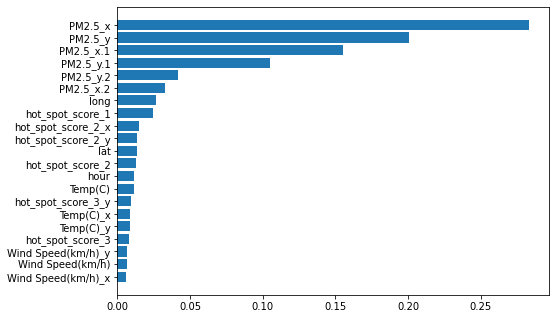

In [ ]:
c = []
for key, values in feature_im.items():
  c.append((values/72, key))
c.sort()
a=[]
b=[]
for (i, j) in c:
  a.append(j)
  b.append(i)
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
feature_name = a
scores = b
ax.barh(feature_name,scores)
plt.show()

In [ ]:
#x = [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
#9.714887686479393
#9.682016768365044 70
#9.676049754320756 90
#9.676616304580989 100
rms = mean_squared_error(y_test, y_pred_real, squared=False)
rms

9.676049754320756

In [ ]:
len(y_pred_real)

628128

In [ ]:
ans = {}
ans['Predicted'] = y_pred_real
ans = pd.DataFrame(data=ans)
#from google.colab import files
#name = 'predict.csv'
#ans.to_csv(name)
#files.download(name)

In [ ]:
ans

,Predicted
0,30.445885
1,30.289719
2,27.986095
3,27.888502
4,28.098082
...,...
628123,13.021181
628124,12.024134
628125,12.184322
628126,12.873032


In [ ]:
ans['Id'] = ans.index
ans = ans[['Id', 'Predicted']]

In [ ]:
test['predict_time']

0        2019-03-18 13:00:00+07:00
1        2019-03-18 14:00:00+07:00
2        2019-03-18 15:00:00+07:00
3        2019-03-18 16:00:00+07:00
4        2019-03-18 17:00:00+07:00
                    ...           
628123   2020-03-18 14:00:00+07:00
628124   2020-03-18 15:00:00+07:00
628125   2020-03-18 16:00:00+07:00
628126   2020-03-18 17:00:00+07:00
628127   2020-03-18 18:00:00+07:00
Name: predict_time, Length: 628128, dtype: datetime64[ns, Asia/Bangkok]

In [ ]:
ans = ans.merge(test['predict_time'], left_index=True, right_index=True)
ans

,Id,Predicted,predict_time
0,0,30.445885,2019-03-18 13:00:00+07:00
1,1,30.289719,2019-03-18 14:00:00+07:00
2,2,27.986095,2019-03-18 15:00:00+07:00
3,3,27.888502,2019-03-18 16:00:00+07:00
4,4,28.098082,2019-03-18 17:00:00+07:00
...,...,...,...
628123,628123,13.021181,2020-03-18 14:00:00+07:00
628124,628124,12.024134,2020-03-18 15:00:00+07:00
628125,628125,12.184322,2020-03-18 16:00:00+07:00
628126,628126,12.873032,2020-03-18 17:00:00+07:00


##Download file ans

This result if for the old format.

In [ ]:
from google.colab import files
ans3 = ans[['Id', 'Predicted']]
name = 'tmp_2.csv'
ans.to_csv(name)
files.download(name)

In [ ]:
pro = [ctb]*104688 + [cm]*104688 + [kbr]*104688 + [bkk]*104688 + [kk]*104688 + [sk]*104688
prov = {}
prov['province'] = pro
pro = pd.DataFrame(data=prov)
pro

,province
0,Chanthaburi
1,Chanthaburi
2,Chanthaburi
3,Chanthaburi
4,Chanthaburi
...,...
628123,Songkhla
628124,Songkhla
628125,Songkhla
628126,Songkhla


In [ ]:
ans = ans.merge(pro['province'], left_index=True, right_index=True)
ans

,Id,Predicted,predict_time,province
0,0,30.445885,2019-03-18 13:00:00+07:00,Chanthaburi
1,1,30.289719,2019-03-18 14:00:00+07:00,Chanthaburi
2,2,27.986095,2019-03-18 15:00:00+07:00,Chanthaburi
3,3,27.888502,2019-03-18 16:00:00+07:00,Chanthaburi
4,4,28.098082,2019-03-18 17:00:00+07:00,Chanthaburi
...,...,...,...,...
628123,628123,13.021181,2020-03-18 14:00:00+07:00,Songkhla
628124,628124,12.024134,2020-03-18 15:00:00+07:00,Songkhla
628125,628125,12.184322,2020-03-18 16:00:00+07:00,Songkhla
628126,628126,12.873032,2020-03-18 17:00:00+07:00,Songkhla


In [ ]:
ans['time'] = ans['predict_time'].dt.tz_localize(None)
ans['time'] = ans['time'].apply(str)
ans

,Id,Predicted,predict_time,province,time
0,0,30.445885,2019-03-18 13:00:00+07:00,Chanthaburi,2019-03-18 13:00:00
1,1,30.289719,2019-03-18 14:00:00+07:00,Chanthaburi,2019-03-18 14:00:00
2,2,27.986095,2019-03-18 15:00:00+07:00,Chanthaburi,2019-03-18 15:00:00
3,3,27.888502,2019-03-18 16:00:00+07:00,Chanthaburi,2019-03-18 16:00:00
4,4,28.098082,2019-03-18 17:00:00+07:00,Chanthaburi,2019-03-18 17:00:00
...,...,...,...,...,...
628123,628123,13.021181,2020-03-18 14:00:00+07:00,Songkhla,2020-03-18 14:00:00
628124,628124,12.024134,2020-03-18 15:00:00+07:00,Songkhla,2020-03-18 15:00:00
628125,628125,12.184322,2020-03-18 16:00:00+07:00,Songkhla,2020-03-18 16:00:00
628126,628126,12.873032,2020-03-18 17:00:00+07:00,Songkhla,2020-03-18 17:00:00


In [ ]:
ans['datetime index'] = ans['province'] +' '+ ans['time']
ans = ans[['Id', 'Predicted', 'datetime index']]
ans

,Id,Predicted,datetime index
0,0,30.445885,Chanthaburi 2019-03-18 13:00:00
1,1,30.289719,Chanthaburi 2019-03-18 14:00:00
2,2,27.986095,Chanthaburi 2019-03-18 15:00:00
3,3,27.888502,Chanthaburi 2019-03-18 16:00:00
4,4,28.098082,Chanthaburi 2019-03-18 17:00:00
...,...,...,...
628123,628123,13.021181,Songkhla 2020-03-18 14:00:00
628124,628124,12.024134,Songkhla 2020-03-18 15:00:00
628125,628125,12.184322,Songkhla 2020-03-18 16:00:00
628126,628126,12.873032,Songkhla 2020-03-18 17:00:00


##For new submission use this one

This file is generated by help of P'TA named P'Annnop

In [ ]:
real = pd.read_csv('https://www.dropbox.com/s/eqx11h8zgz07so1/jack_final_submission_with_index.csv?dl=1')
real

,id,Predicted,datetime index
0,0,30.445885,Chanthaburi 2019-03-18 13:00:00
1,1,30.289719,Chanthaburi 2019-03-18 14:00:00
2,2,27.986095,Chanthaburi 2019-03-18 15:00:00
3,3,27.888502,Chanthaburi 2019-03-18 16:00:00
4,4,28.098082,Chanthaburi 2019-03-18 17:00:00
...,...,...,...
448549,448549,13.021181,Songkhla 2020-03-18 14:00:00
448550,448550,12.024134,Songkhla 2020-03-18 15:00:00
448551,448551,12.184322,Songkhla 2020-03-18 16:00:00
448552,448552,12.873032,Songkhla 2020-03-18 17:00:00


In [ ]:
from google.colab import files
ans3 = real[['id', 'Predicted']]
name = 'tmp_3.csv'
ans.to_csv(name)
files.download(name)